In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [32]:
matches = pd.read_csv(r"C:/Users/user/Desktop/Fifa-Project/Fifa_World_Cup_Data/WorldCupMatches.csv")
players = pd.read_csv(r"C:/Users/user/Desktop/Fifa-Project/Fifa_World_Cup_Data/WorldCupPlayers.csv")
worldCup = pd.read_csv(r"C:/Users/user/Desktop/Fifa-Project/Fifa_World_Cup_Data/WorldCups.csv")
display(matches.head(3), players.head(3), worldCup.head(3))



,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


Text(0.5, 1.0, 'Attendence in every World Cup Year')

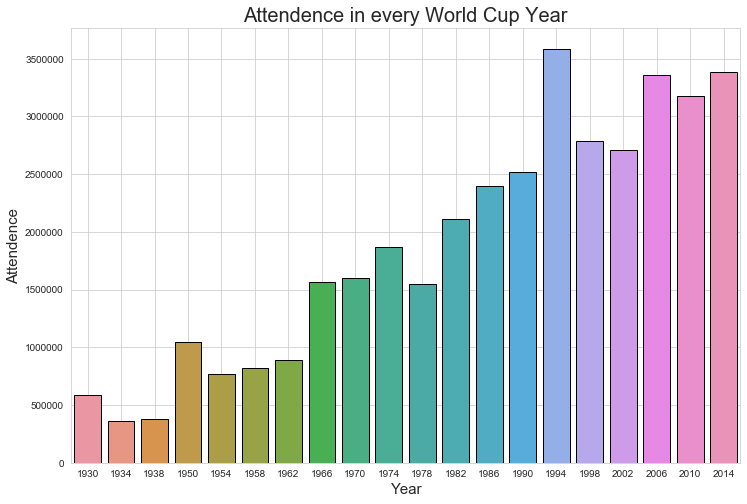

In [33]:
matches.isnull().sum()
sns.set_style("whitegrid")

matches = matches.drop_duplicates(subset ='MatchID', keep = 'first')
matches = matches[matches["Year"].notnull()]
att = matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"]=att["Year"].astype(int)
plt.figure(figsize = (12,8))
sns.barplot(att["Year"], att["Attendance"], linewidth = 1, edgecolor = "k"*len(att))
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Attendence", fontsize = 15)
plt.grid(True)
plt.title("Attendence in every World Cup Year", fontsize = 20)

Text(0.5, 1.0, 'Average Attendance in every World Cup Year')

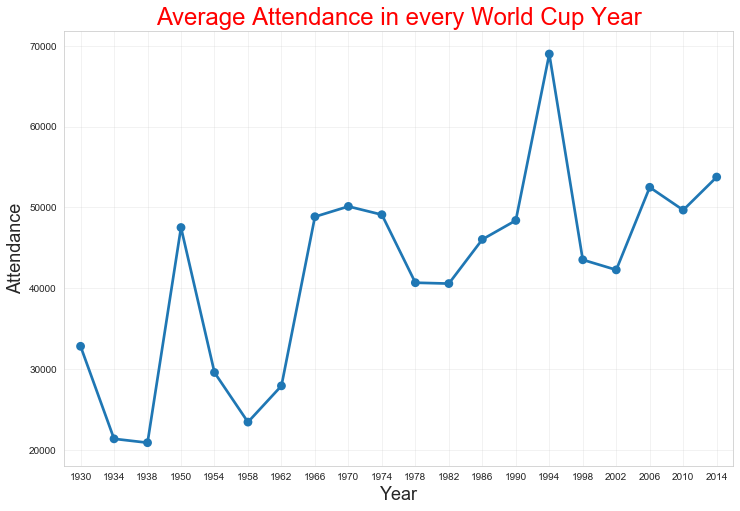

In [34]:
att1= matches.groupby("Year")["Attendance"].mean().reset_index()
att1["Year"] = att1["Year"].astype(int)

plt.figure(figsize = (12,8))
sns.pointplot(att1["Year"], att1["Attendance"])
plt.grid(True, alpha=.3)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Attendance", fontsize = 18)
plt.title("Average Attendance in every World Cup Year", fontsize = 24, color='r')

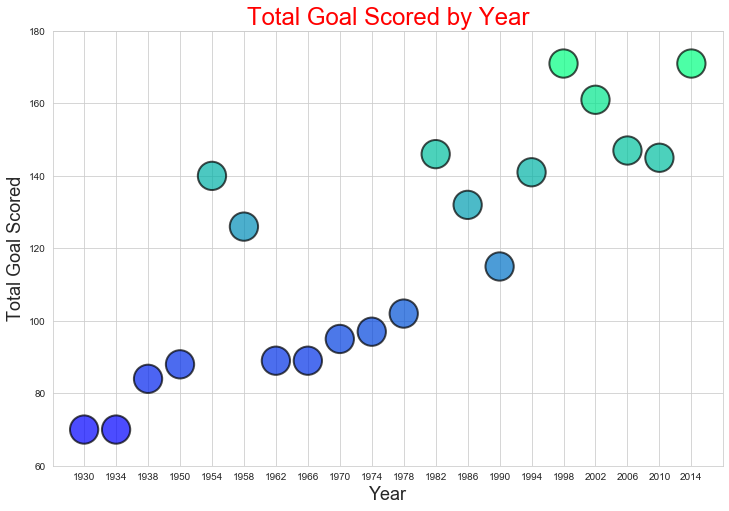

In [35]:
plt.figure(figsize=(12,8))
worldCup["Year1"]=worldCup["Year"].astype(str)

c=worldCup["GoalsScored"]
cmap = plt.cm.get_cmap("winter")
ax = plt.scatter("Year1", "GoalsScored",data=worldCup,c=c,cmap=cmap,s=800,alpha=.7,linewidth=2,edgecolor="k")
plt.xticks(worldCup["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.xlabel("Year", fontsize=18)
plt.ylabel("Total Goal Scored",fontsize=18)
plt.title("Total Goal Scored by Year",fontsize=24,color='r')
plt.show()

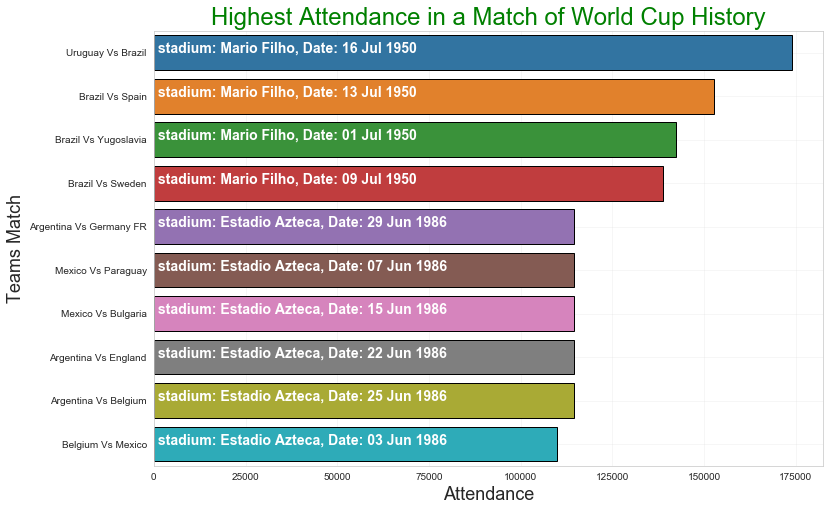

In [36]:
h_att = matches.sort_values(by="Attendance", ascending=False)[:10]
h_att = h_att[["Year", "Datetime", "Stadium","City", "Home Team Name", "Away Team Name", "Attendance", "MatchID"]]
h_att["Stadium"]=h_att["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho', 'Mario Filho')
h_att["Datetime"]=h_att["Datetime"].str.split("-").str[0]
h_att["tm"]=h_att["Home Team Name"] + " Vs " + h_att["Away Team Name"]
plt.figure(figsize=(12,8))
ax = sns.barplot(y=h_att["tm"], x=h_att["Attendance"],linewidth = 1, edgecolor = "k" )
plt.grid(True, alpha=.2)
plt.xlabel("Attendance", fontsize=18)
plt.ylabel("Teams Match", fontsize=18)
plt.title("Highest Attendance in a Match of World Cup History", fontsize=24, color='g')
for i,j in enumerate(" stadium: "+h_att["Stadium"] + ", Date: " + h_att["Datetime"]):
    ax.text(.7,i,j,fontsize=14,color='white', weight='bold')


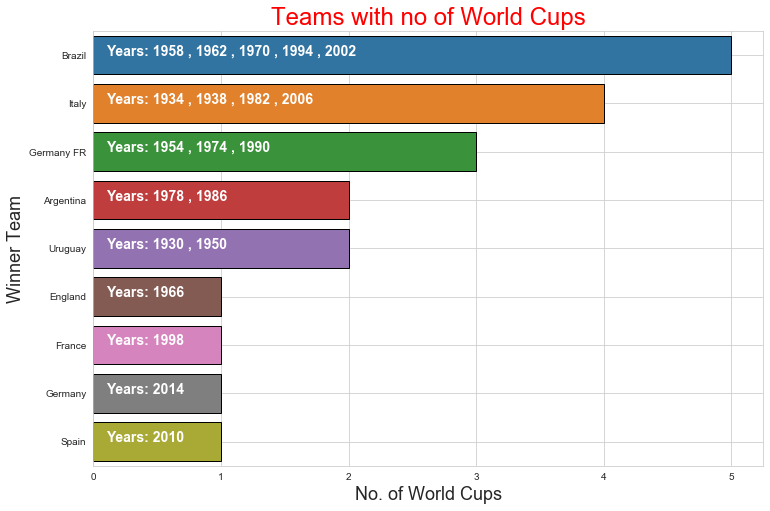

In [37]:
c1 = worldCup.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
c2 = worldCup.groupby("Winner")["Year"].count().reset_index()
c12 = c1.merge(c2,left_on="Winner",right_on="Winner",how="left")
c12 = c12.sort_values(by="Year", ascending=False)
plt.figure(figsize = (12,8))
ax = sns.barplot("Year", "Winner", data=c12, linewidth=1, edgecolor="k"*len(c12))
plt.grid(True)
plt.xlabel("No. of World Cups", fontsize=18)
plt.ylabel("Winner Team", fontsize=18)
plt.title("Teams with no of World Cups", fontsize=24,color='r')
for i,j in enumerate("Years: " + c12["Year1"]):
    ax.text(.1,i,j,color='white',weight='bold',fontsize=14)

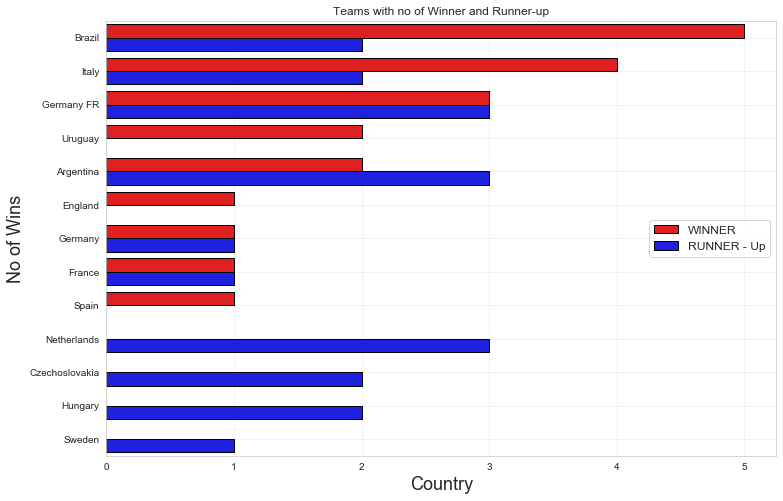

In [71]:
c = worldCup["Winner"].value_counts().reset_index()
c_w = c.copy()
c_w.columns = ["country","count"]
c_w["type"] = "WINNER"

c_r = worldCup["Runners-Up"].value_counts().reset_index()
c_r.columns = ["country","count"]
c_r["type"] = "RUNNER - Up"

c_t = pd.concat([c_w,c_r],axis=0)

plt.figure(figsize = (12,8))
sns.barplot("count","country",data=c_t,hue="type",palette=['r','b'],linewidth=1,edgecolor='k'*len(c_t))
plt.grid(True, alpha=.3)
plt.xlabel("Country",fontsize=18)
plt.ylabel("No of Wins",fontsize=18)
plt.title("Teams with no of Winner and Runner-up")
plt.legend(loc="center right",prop={"size":12})


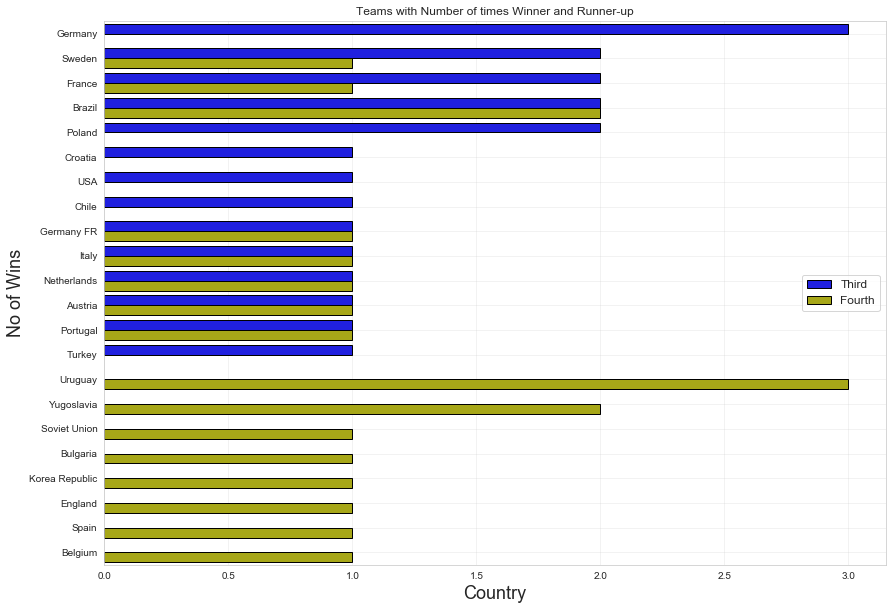

In [90]:
c = worldCup["Third"].value_counts().reset_index()
c_w = c.copy()
c_w.columns = ["country","count"]
c_w["type"] = "Third"

c_r = worldCup["Fourth"].value_counts().reset_index()
c_r.columns = ["country","count"]
c_r["type"] = "Fourth"

c_t = pd.concat([c_w,c_r],axis=0)

plt.figure(figsize = (14,10))
sns.barplot("count","country",data=c_t,hue="type",palette=['b','y'],linewidth=1,edgecolor='k'*len(c_t))
plt.grid(True, alpha=.3)
plt.xlabel("Country",fontsize=18)
plt.ylabel("No of Wins",fontsize=18)
plt.title("Teams with Number of times Winner and Runner-up")
plt.legend(loc="center right",prop={"size":12})


Text(0.5, 1.0, 'Total number of matches played by each country')

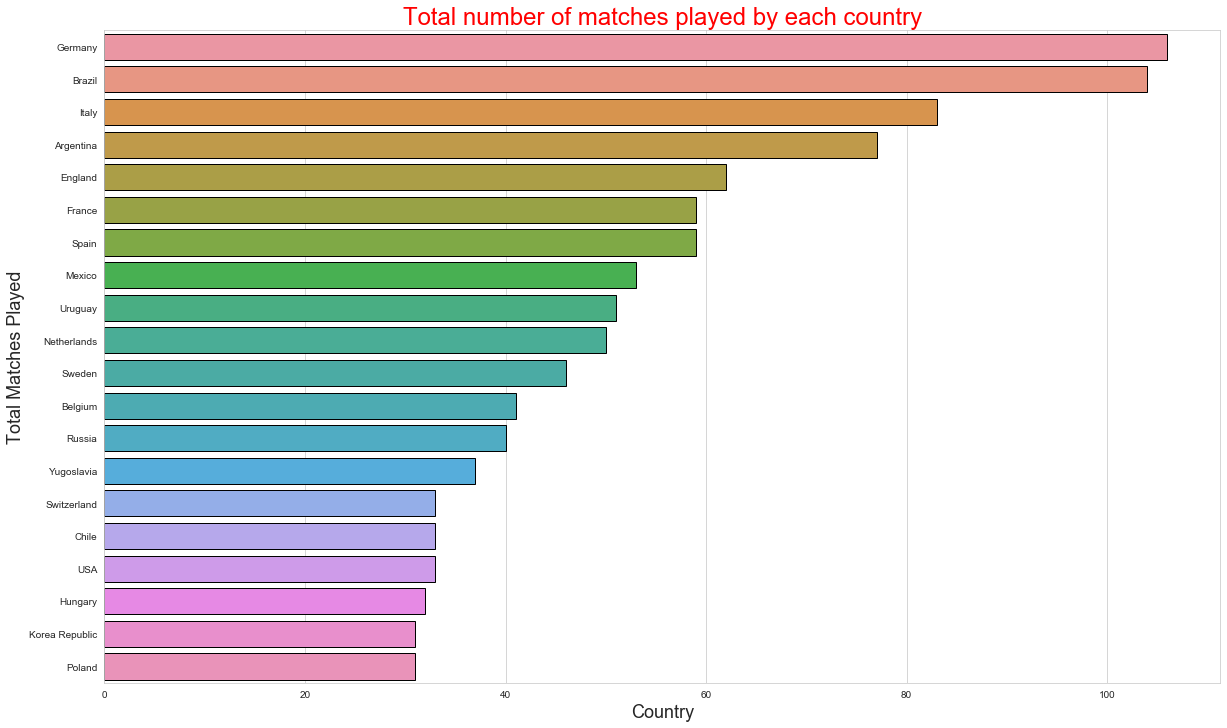

In [104]:

sns.set_style("whitegrid")
matches["Home Team Name"] = matches["Home Team Name"].replace('Germany FR','Germany')
matches["Home Team Name"] = matches["Home Team Name"].replace('Soviet Union','Russia')
matches["Away Team Name"] = matches["Away Team Name"].replace('Germany FR','Germany')
matches["Away Team Name"] = matches["Away Team Name"].replace('Soviet Union','Russia')
c = matches["Home Team Name"].value_counts().reset_index()
c.columns=["country", "matches"]
c1= matches["Away Team Name"].value_counts().reset_index()
c1.columns = ["country", "matches"]
c_t= pd.concat([c,c1],axis=0)

c_t=c_t.groupby("country")["matches"].sum().reset_index().sort_values(by="matches", ascending=False)

plt.figure(figsize = (20,12))
sns.barplot("matches","country",data=c_t[:20],linewidth=1,edgecolor='k'*len(c_t))
plt.xlabel("Country", fontsize=18)
plt.ylabel("Total Matches Played", fontsize=18)
plt.title("Total number of matches played by each country", fontsize=24, color='r')